<a href="https://colab.research.google.com/github/shannonlal/Statistical-YCBS-255/blob/main/Assignment02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2  <font color="blue"> (15 points) </font>
 
***

### General Instructions
  + You may need additional libraries besides the Python standard library to solve some questions. Import only necessary libraries. 
  + If more than one library exist for a same purpose, choose the one you wish as long as it does the task properly. 
  + If we want you to use a specific library, then we will state it clearly. 
  + Use the exact variable names asked in the questions. When no clear instructions given, feel free to do it the way you would like to.
  + After each question, add the needed number of new cells and place your answers inside the cells. 
  + Use text cells for explanations. Use explanation and plain text as much as possible. 
  + Do not remove or modify the original cells provided by the instructor.
  + In the following cell you will find some extra options to make your code more readable, including output colors RED, OKBLUE, or output text styles like BOLD or UNDERLINE that. Do not hesitate to use them. As an example, one may output text in red as follows: 
  ```python
     print(bcolors.RED + "your text" + bcolors.ENDC)
  ```
  + Comment your code whenever needed using # sign at the beginning of the row.
  + In some questions some of the details needed for solving the problem are **purposely** omitted to encourage additional self-directed research. This, especially, helps you develop some search skills for coding in Python (which is inevitable due to the inconsistent syntax of Python).
  + Do not hesitate to communicate your questions to the TA's or instructors. 
    
  Good luck! 

In [55]:

# The following piece of code gives the opportunity to show multiple outputs
# in one cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# Colorful outputs
class bcolors:
    RED       = '\033[91m'
    OKBLUE    = '\033[94m'
    BOLD      = '\033[1m'
    UNDERLINE = '\033[4m'
    ENDC      = '\033[0m'

## **Part A** <font color="blue">(7 points)</font>

1. **<font color=blue> (1 point) </font>** Download `Credit.csv` from <http://faculty.marshall.usc.edu/gareth-james/ISL/data.html> and upload it into this notebook. Print the first $5$ rows of the data. Using appropriate descriptive statistics or visualization methods describe the variables and possible association amongst them. Interpret the results. 
2. **<font color=blue> (0.5 points)</font>** Keep only `Income`, `Limit`, `Rating`, `Cards`, `Age`, `Education`, and `Balance` as your variables and throw the rest of variables away. Print the dimension of this new dataset. 
3.  **<font color=blue> (0.5 points) </font>** Create a binary variable `Balance_1500` which equals $1$ for the observations with `Balance` $> 1500$, and equals $0$ otherwise.
4. **<font color=blue> (3 points) </font>** Model `Balance_1500` by the explanatory variables `Income`, `Limit`, `Rating`, `Cards`, `Age`, `Education` using the following models: 
    + logistic regression, 
    + linear discriminant, and 
    + quadratic discriminant.
8. **<font color=blue> (0.5 points) </font>** Find the probability of (`Balance` $> 1500$), for the following values, using all three aforementionned methods:

|    Income    |    Limit     |     Rating     |    Cards     |      Age        |   Education   | 
|--------------|--------------|----------------|--------------|-----------------|---------------|
|      63      |    8100      |     600        |      4       |       30        |      13       |
|     186      |    13414     |     950        |      2       |       41        |      13       |

</br>
Compare the probabilities and comment.
    
9. **<font color=blue> (1.5 points) </font>** For each method, print the confusion matrix, the accuracy score and the AUC using all observations. Compare these metrics and comment. 

In [56]:
# Load Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.utils.multiclass import check_classification_targets

In [3]:
# Part A - Q1: Download Credit.csv from http://faculty.marshall.usc.edu/gareth-james/ISL/data.html and 
# upload it into this notebook.
from google.colab import files
uploaded = files.upload()

Saving Credit.csv to Credit.csv


,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,14.891,3606,283,2,34,11,No,No,Yes,South,333
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903
2,104.593,7075,514,4,71,11,No,No,No,West,580
3,148.924,9504,681,3,36,11,Yes,No,No,West,964
4,55.882,4897,357,2,68,16,No,No,Yes,South,331


,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


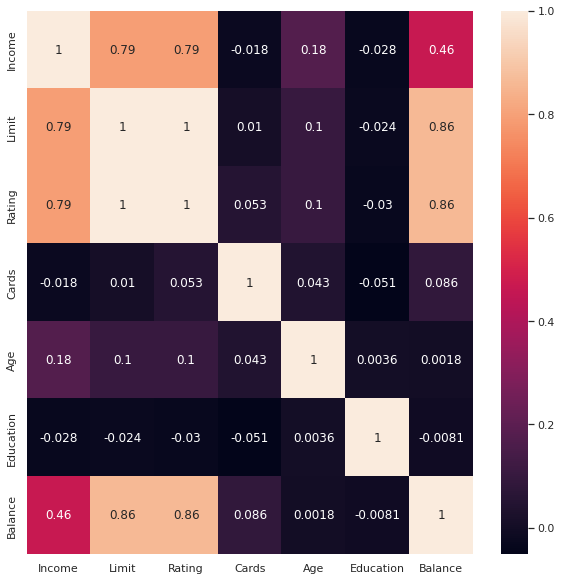

In [62]:
# Part A - Q1: Print the first  5  rows of the data. Using appropriate descriptive statistics or visualization methods 
# describe the variables and possible association amongst them. Interpret the results. Convert into a Panda
credit_data = pd.read_csv('Credit.csv')

# Display the first elements
credit_data.head()

# Describe the Data Set
credit_data.describe()

# Create a heat map and correlation matrix as discussed in Tutorial
corr_matrix = credit_data.corr()
sns.heatmap(corr_matrix, annot=True)
sns.set(rc = {'figure.figsize':(10,10)})
plt.show()


**Part A Question 1: Summary Note:**

When looking at the correlation matrix numbers that are close to 1 reference a high correlation between the variables.  Numbers less than .5 are indicative of not a strong relationship.  A - or + sign indicates that the direction of the corrolation.

Based on the corrolation matrix below, we can see there is a strong relationship between balance, income and rating (0.86). Also, there is good relationship between income and (0.79) limit and (0.79) rating.

In [63]:
# Part A: Q2 - Keep only Income, Limit, Rating, Cards, Age, Education, and Balance as your variables and throw the rest of variables away. 
# Print the dimension of this new dataset.

## Dataset changed
## Note to TA.  Note this is verbose, but easy to test
credit_data.drop('Region', axis=1, inplace=True)
credit_data.drop('Own', axis=1, inplace=True)
credit_data.drop('Student', axis=1, inplace=True)
credit_data.drop('Married', axis=1, inplace=True)

# List top 5 records
credit_data.head()

# Assert the shape is 400 rows and 7 columns
assert credit_data.shape == (400,7)

# Check if there are any null values in entire data frame
assert credit_data.isnull().values.any() == False

,Income,Limit,Rating,Cards,Age,Education,Balance
0,14.891,3606,283,2,34,11,333
1,106.025,6645,483,3,82,15,903
2,104.593,7075,514,4,71,11,580
3,148.924,9504,681,3,36,11,964
4,55.882,4897,357,2,68,16,331


In [64]:
# Part A: Q3 - Create a binary variable Balance_1500 which equals  1  for the observations with Balance  >1500 , and equals  0  otherwise.

## Step 1: Create a function that determines the balance is high
## NOTE: TO TA.  I know this is verbose, but it is easy to read and it is testable
def balance_high(row):
  if row['Balance'] > 1500: 
    return 1
  else:
    return 0

# Test case for High Balance
df_test_1 = {'Balance':1501}
assert balance_high( df_test_1 ) == True
df_test_2 = {'Balance':1499}
assert balance_high( df_test_2 ) == False

## Step 2: Create a row called balance_1500 and apply the balance_high function.  Format data and print shape
credit_data['Balance_1500'] = credit_data.apply( balance_high, axis =1 )
credit_data = credit_data.astype({'Balance_1500': int})
print(credit_data.head())
print(credit_data.shape)

## Step 3: Count the number of credits above 1500
high_balance_count = 0
for balance_score in credit_data.Balance_1500:
  if balance_score == 1:
    high_balance_count+=1

print(bcolors.RED + "In the data set the percentage of applicants with a balance above 1500 is :" + bcolors.ENDC, (high_balance_count/ credit_data.count()*100)) 



    Income  Limit  Rating  Cards  Age  Education  Balance  Balance_1500
0   14.891   3606     283      2   34         11      333             0
1  106.025   6645     483      3   82         15      903             0
2  104.593   7075     514      4   71         11      580             0
3  148.924   9504     681      3   36         11      964             0
4   55.882   4897     357      2   68         16      331             0
(400, 8)
In the data set the percentage of applicants with a balance above 1500 is : Income          2.25
Limit           2.25
Rating          2.25
Cards           2.25
Age             2.25
Education       2.25
Balance         2.25
Balance_1500    2.25
dtype: float64


In [65]:
# Part A: Q4 - Prepare the data
from sklearn.metrics import confusion_matrix
X = credit_data[['Income','Limit','Rating','Cards','Age','Education']]
y = credit_data['Balance_1500']

In [66]:
# Part A: Q4 - Build Logistic Regression Model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=4000)
lr.fit(X, y)

print(bcolors.RED + "The Intercept for the Logistic Regression Model is :" + bcolors.ENDC, lr.intercept_) 
print(bcolors.RED + "The Coefficents for the Logistic Regression Model are :" + bcolors.ENDC, lr.coef_) 

LogisticRegression(max_iter=4000)

The Intercept for the Logistic Regression Model is : [-16.77144268]
The Coefficents for the Logistic Regression Model are : [[-0.08381135  0.00186085  0.01244322  0.11159392 -0.02029975 -0.07713963]]


In [67]:
# Part A: Q4 - Build Linear Discriminant Model
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)


LinearDiscriminantAnalysis()

In [68]:
# Part A: Q4 - Build Quadratic Discriminant Analysis Model
qda = QuadraticDiscriminantAnalysis()
qda.fit(X, y)
 

QuadraticDiscriminantAnalysis()

In [69]:
# Part A: Q5 - Find the probability of (Balance  >1500 ), for the following values, Logistic Regression.  

predict_credit_data = {'Income': [63, 186], 'Limit': [8100, 13414],'Rating': [600, 950], 'Cards': [4, 2],'Age': [30, 41], 'Education': [13, 13]}
predict_credit_data_frame = pd.DataFrame(data=predict_credit_data)

# Find the probability of (Balance  >1500 ), for the following values, Logistic Regression  
lr_prob_under_1500 = lr.predict_proba(predict_credit_data_frame)
print(bcolors.RED + "Logistic Regression Predicted :" + bcolors.ENDC, lr_prob_under_1500) 

# Find the probability of (Balance  >1500 ), for the following values, Linear Discriminant Analysis  
lda_prob_under_1500 = lda.predict_proba(predict_credit_data_frame)
print(bcolors.RED + "Linear Discriminant Analysis Predicted :" + bcolors.ENDC, lda_prob_under_1500) 

# Part A: Q5 - Find the probability of (Balance  >1500 ), for the following values, Quadratic Discriminant Analysis 
qda_prob_under_1500 = qda.predict_proba(predict_credit_data_frame)
print(bcolors.RED + "Quadratic Discriminant Analysis Predicted :" + bcolors.ENDC, qda_prob_under_1500) 


Logistic Regression Predicted : [[0.66332506 0.33667494]
 [0.05677163 0.94322837]]
Linear Discriminant Analysis Predicted : [[0.94050988 0.05949012]
 [0.00721199 0.99278801]]
Quadratic Discriminant Analysis Predicted : [[9.99999995e-01 4.93626009e-09]
 [7.83057752e-04 9.99216942e-01]]


## Part A Question 5. 

Intrepation of the predict_proba results.  From the Sklearn package the predit_proba returns the an array of the probability that this sample data fits into each of the classes.  The two classifiers we were dealing with were 0 an 1 which.

1 Balance above 1500 

0 Balance below 1500

The predict_proba will return the results in the following format 

[(0) Prob of 0,(1) Prod of 1]

From the Correlation Matrix above we know that that balance is heavily influencec by limit and rating.  Income has a slight impact but the other variables do not have a strong influence on this.  

**Logistic Regrstion**
[[0.66332506 0.33667494] -- First Individual.  66% the balance is below 1500 and 33% over 1500
[0.05677163 0.94322837]] -- Second Indvidual. 5% the balance is below 1500 and 94% the balance over 1500

**Linear Discriminant Analysis**

[0.94050988 0.05949012] -- First Individual.  94% the balance is below 1500 and 6% above 1500
[0.00721199 0.99278801] -- Second Indvidual. 1% the balance is below 1500 and 99% the balance is above 1500

**Quadratic Discriminant Analysis**
[9.99999995e-01 4.93626009e-09] -- First Individual.  99% the balance is below 1500 and a % above 1500
[7.83057752e-04 9.99216942e-01]] -- Second Indvidual. 1% the balance is below 1500 and 99% the balance is above 1500

**Summary**
The above numbers seem to correspond with our corrolation matrix.  The first indivdual has a Limit 8100 and a Rating of 600 and a predicted Balance below 1500, while our second individual has a Limit of 13414 and Rating of 950 and a predicted balance above 1500

In [70]:
# Part A: Q9 - For each method, print the confusion matrix, the accuracy score and the AUC using all observations. Compare these metrics and comment.

## Logistic Regression
lr_y_predicted = lr.predict( X )
print(bcolors.RED + "\n LR Confusion Matrix: \n" + bcolors.ENDC, confusion_matrix(y, lr_y_predicted)) 
print(bcolors.RED + "\n LR Accuracy: " + bcolors.ENDC, accuracy_score(y, lr_y_predicted)) 
print(bcolors.RED + "\n LR Area Under the Curve (AUC): " + bcolors.ENDC, roc_auc_score(y,lr_y_predicted))

## Linear Discriminant Analysis 
lda_y_predicted = lda.predict( X )
print(bcolors.RED + "\n LDA Confusion Matrix: \n" + bcolors.ENDC, confusion_matrix(y, lda_y_predicted)) 
print(bcolors.RED + "\n LDA Accuracy: " + bcolors.ENDC, accuracy_score(y, lda_y_predicted)) 
print(bcolors.RED + "\n LDA Area Under the Curve (AUC): " + bcolors.ENDC, roc_auc_score(y,lda_y_predicted))


## Quadratic Discriminant Analysis
qda_y_predicted = qda.predict( X )
print(bcolors.RED + "\n QDA Confusion Matrix: \n" + bcolors.ENDC, confusion_matrix(y, qda_y_predicted)) 
print(bcolors.RED + "\n QDA Accuracy: " + bcolors.ENDC, accuracy_score(y, qda_y_predicted)) 
print(bcolors.RED + "\n QDA Area Under the Curve (AUC): " + bcolors.ENDC, roc_auc_score(y,qda_y_predicted))


 LR Confusion Matrix: 
 [[391   0]
 [  3   6]]

 LR Accuracy:  0.9925

 LR Area Under the Curve (AUC):  0.8333333333333333

 LDA Confusion Matrix: 
 [[383   8]
 [  4   5]]

 LDA Accuracy:  0.97

 LDA Area Under the Curve (AUC):  0.7675475987496447

 QDA Confusion Matrix: 
 [[390   1]
 [  2   7]]

 QDA Accuracy:  0.9925

 QDA Area Under the Curve (AUC):  0.8876101165103721


# Part A: Q9 - Summary

In part A we did 3 different models to predict balance above and below 1500.  To evaluate the 3 different models we used 3 different techniques for this: Confusion Matrix, Accurancy and AUC.  

**Confusion Matrix**

The Confusion Matrix indicates the models ability to correctly predict values and maps out the True Positive, True Negative, False Positive and False Negative.  If we compare the different confusion matrixs against the models we can see above that Logistic Regression and QDA have very similar values and are better at correctly matching observations compared to LDA.

**Accuracy** 

Is defined as the total number of correct predictions divided by the total data set.  Again we can see above that both LR and QDA have very and similar accuracies for their models (99.25%) where as LDA has a slightly less accurate model with 97%

**Area Under the Curve (AUC)**

We know from our course notes, that AUC is the ability of the model to distinguish betweeen the classes.  A model with a higher AUC is seen as a better performing model.  From above we can see that LR has a AUC of 83.3%, LDA 76.75% and QDA is 88.76%.  Based on this we can say that QDA is the better performing model



## **Part B** <font color="blue">(8 points)</font>

Donwload  `ziptrain.csv` and `ziptest.csv` datasets from  **Athena/Content/Data**. Save them and upload them here as **two separate datasets** and name them `ziptrain` and `ziptest`, respectively. Explore the data in order to understand it. 

  1. **<font color="blue">(1 point)</font>** From `ziptrain` dataset select only the rows corresponding to digits $2$ and $7$ and save them in a new dataset called `binar_train`. Do the same thing in `ziptest` and call it `binar_test`. 
  2. **<font color="blue">(1 point)</font>** Project `binar_train` onto the first **two principal components** and make a scatterplot of the data in the new space (two-dimensional space spanned by the frist two PCs). Use a different color (or marker) for each digit. Based on the plot do you think that these two digits can be separated well using only two PCs? Explain.
  3. **<font color="blue">(1 point)</font>** Fit a **logistic regression**, in the new space, to separate digits $2$ and $7$. 
  4. **<font color="blue">(1 point)</font>** Evaluate the trainded model on `binar_test` using **accuracy**, and an **appropriate F-measure**. 
  5. **<font color="blue">(0.5 points)</font>** Build and print a confusion matrix for your predictions.

For the rest of the questions use the **whole training data**, i.e., `ziptrain` (**not** `binar_train`). 

  6. **<font color="blue">(1 point)</font>** Project the whole data onto the first $m=2, 3, 4, 5$ principal components (one $m$ at a time).
  7. **<font color="blue">(1.5 points)</font>** For each $m$, and using **$5$-fold cross-validation**, train a **linear discriminant** classifier on `ziptrain`. 
  8. **<font color="blue">(1 point)</font>** Based on **cross-validated accuracy**, select the best number of principal components $m$.


In [21]:
# Load the sample ziptrain into the jupiter
from google.colab import files
uploaded = files.upload()

Saving ziptrain.csv to ziptrain.csv


In [71]:
# Load the train data and remove excess data
from os import strerror
# Convert into a Panda
ziptrain = pd.read_csv('ziptrain.csv', delimiter=' ', header=None)

ziptrain.rename( columns={0: 'label'}, inplace=True)
ziptrain['label'] = pd.to_numeric( ziptrain['label'], downcast='integer')
# Drop last column because it was NA
ziptrain.drop(ziptrain.columns[257], axis=1, inplace=True)

ziptrain.head()
ziptrain.shape
ziptrain.count
ziptrain.dtypes


,label,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256
0,6,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,-0.167,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.992,0.297,1.000,0.307,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.410,...,1.000,1.000,1.000,1.000,0.135,-1.0,-1.000,-1.000,-1.0,-1.000,-1.000,-0.483,0.813,1.0,1.000,1.0,1.000,1.000,1.0,0.219,-0.943,-1.000,-1.000,-1.00,-1.0,-1.0,-1.0,-1.000,-0.974,-0.429,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0
1,5,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,-1.000,-1.000,-0.774,-0.180,0.052,-0.241,-1.0,-1.0,-1.0,-1.0,0.392,1.000,0.857,0.727,1.000,0.805,0.613,0.613,0.860,1.000,1.000,0.396,-1.0,-1.0,-1.0,-1.0,-0.548,1.000,1.000,1.000,...,0.970,0.970,0.970,0.998,1.000,1.0,1.000,0.109,-1.0,-1.000,-0.830,-0.242,0.350,0.8,1.000,1.0,1.000,1.000,1.0,1.000,1.000,1.000,0.616,-0.93,-1.0,-1.0,-1.0,-1.000,-1.000,-0.858,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
2,4,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.996,0.147,1.000,-0.189,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.882,1.000,0.390,-0.811,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,...,-1.000,-0.426,1.000,0.555,-1.000,-1.0,-1.000,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,-1.0,-1.000,-1.0,-1.000,0.024,1.0,0.388,-1.000,-1.000,-1.000,-1.00,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0
3,7,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,-0.067,-0.679,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,-0.114,0.974,0.917,0.734,0.994,1.000,0.973,0.391,-0.421,-0.976,-1.000,-1.0,-1.0,-1.0,-1.0,-0.323,0.991,0.622,-0.738,...,0.432,-1.000,-1.000,-1.000,-1.000,-1.0,-1.000,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,-1.0,-0.348,1.0,0.798,-0.935,-1.0,-1.000,-1.000,-1.000,-1.000,-1.00,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.318,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
4,3,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,0.234,-0.809,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,-0.370,0.739,1.000,1.000,1.000,1.000,0.644,-0.890,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,0.616,1.000,0.688,...,-0.733,-0.733,-0.733,-0.433,0.649,1.0,0.093,-1.000,-1.0,-0.959,-0.062,0.821,1.000,1.0,1.000,1.0,1.000,1.000,1.0,1.000,1.000,0.583,-0.843,-1.00,-1.0,-1.0,-1.0,-0.877,-0.326,0.174,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0


(7291, 257)

<bound method DataFrame.count of       label    1    2    3      4  ...    252    253    254    255  256
0         6 -1.0 -1.0 -1.0 -1.000  ... -0.991 -1.000 -1.000 -1.000 -1.0
1         5 -1.0 -1.0 -1.0 -0.813  ...  0.126 -0.095 -0.671 -0.828 -1.0
2         4 -1.0 -1.0 -1.0 -1.000  ... -0.179 -1.000 -1.000 -1.000 -1.0
3         7 -1.0 -1.0 -1.0 -1.000  ... -1.000 -1.000 -1.000 -1.000 -1.0
4         3 -1.0 -1.0 -1.0 -1.000  ...  0.439 -0.199 -0.883 -1.000 -1.0
...     ...  ...  ...  ...    ...  ...    ...    ...    ...    ...  ...
7286      3 -1.0 -1.0 -1.0 -0.988  ... -1.000 -1.000 -1.000 -1.000 -1.0
7287      3 -1.0 -1.0 -1.0 -0.990  ... -1.000 -1.000 -1.000 -1.000 -1.0
7288      3 -1.0 -1.0 -1.0 -0.783  ... -0.933 -1.000 -1.000 -1.000 -1.0
7289      0 -1.0 -1.0 -1.0 -1.000  ... -0.687 -1.000 -1.000 -1.000 -1.0
7290      1 -1.0 -1.0 -1.0 -1.000  ... -1.000 -1.000 -1.000 -1.000 -1.0

[7291 rows x 257 columns]>

label       int8
1        float64
2        float64
3        float64
4        float64
          ...   
252      float64
253      float64
254      float64
255      float64
256      float64
Length: 257, dtype: object

In [23]:
# Load the sample ziptest into the jupiter notebook
from google.colab import files
uploaded = files.upload()

Saving ziptest.csv to ziptest.csv


In [72]:
# Load the test data and remove excess data
from os import strerror
# Convert into a Panda
ziptest = pd.read_csv('ziptest.csv', delimiter=' ', header=None)

ziptest.rename( columns={0: 'label'}, inplace=True)
ziptest['label'] = pd.to_numeric( ziptest['label'], downcast='integer')

ziptest.head()
ziptest.shape
ziptest.count
ziptest.dtypes

,label,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256
0,9,-1.0,-1.0,-1.0,-1.000,-1.0,-0.948,-0.561,0.148,0.384,0.904,0.290,-0.782,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.748,0.588,1.000,1.000,0.991,0.915,1.000,0.931,-0.476,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,-0.787,0.794,1.000,0.727,...,0.998,0.841,-0.932,-1.000,-1.0,-1.000,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.424,1.0,0.732,-1.0,-1.00,-1.000,-1.000,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.908,0.430,0.622,-0.973,-1.000,-1.0,-1.0,-1.0,-1.0
1,6,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.783,-0.973,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.364,0.789,-0.371,...,0.774,0.774,0.302,-0.522,-1.0,-1.000,-1.000,-1.0,-1.000,-1.000,-1.000,-0.663,-0.606,-0.606,-0.606,-0.688,-1.0,-1.000,-1.0,-1.00,-1.000,-1.000,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0
2,3,-1.0,-1.0,-1.0,-0.593,0.7,1.000,1.000,1.000,1.000,0.853,0.075,-0.925,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.553,0.998,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.961,-0.076,-0.999,-1.0,-1.0,-1.0,-1.0,0.228,1.000,0.849,-0.150,-0.705,...,0.389,1.000,1.000,1.000,1.0,0.497,-1.000,-1.0,-1.000,-1.000,0.507,1.000,1.000,1.000,1.000,1.000,1.0,1.000,1.0,0.83,0.053,-0.946,-1.0,-1.0,-1.0,-1.000,-0.941,0.059,0.615,1.000,1.000,0.717,0.333,0.162,-0.393,-1.000,-1.0,-1.0,-1.0,-1.0
3,6,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.417,-0.330,...,-0.021,-0.182,-0.648,-0.780,-1.0,-1.000,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.000,-1.0,-1.00,-1.000,-1.000,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0
4,6,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-0.858,-0.106,0.802,-0.210,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.854,0.597,1.000,0.798,-0.388,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.481,0.600,...,0.142,-0.584,0.075,0.833,1.0,0.123,-0.963,-1.0,-0.537,0.896,1.000,1.000,1.000,1.000,1.000,1.000,1.0,1.000,1.0,0.83,-0.387,-0.976,-1.0,-1.0,-1.0,-0.697,-0.108,0.312,0.901,0.901,0.901,0.901,0.901,0.290,-0.369,-0.867,-1.0,-1.0,-1.0,-1.0


(2007, 257)

<bound method DataFrame.count of       label    1    2    3      4      5  ...    251    252  253  254  255  256
0         9 -1.0 -1.0 -1.0 -1.000 -1.000  ... -0.973 -1.000 -1.0 -1.0 -1.0 -1.0
1         6 -1.0 -1.0 -1.0 -1.000 -1.000  ... -1.000 -1.000 -1.0 -1.0 -1.0 -1.0
2         3 -1.0 -1.0 -1.0 -0.593  0.700  ... -0.393 -1.000 -1.0 -1.0 -1.0 -1.0
3         6 -1.0 -1.0 -1.0 -1.000 -1.000  ... -1.000 -1.000 -1.0 -1.0 -1.0 -1.0
4         6 -1.0 -1.0 -1.0 -1.000 -1.000  ... -0.369 -0.867 -1.0 -1.0 -1.0 -1.0
...     ...  ...  ...  ...    ...    ...  ...    ...    ...  ...  ...  ...  ...
2002      3 -1.0 -1.0 -1.0 -1.000 -1.000  ... -0.484 -1.000 -1.0 -1.0 -1.0 -1.0
2003      9 -1.0 -1.0 -1.0 -1.000 -1.000  ... -1.000 -1.000 -1.0 -1.0 -1.0 -1.0
2004      4 -1.0 -1.0 -1.0 -1.000 -0.031  ... -1.000 -1.000 -1.0 -1.0 -1.0 -1.0
2005      0 -1.0 -1.0 -1.0 -1.000 -0.534  ... -0.975 -1.000 -1.0 -1.0 -1.0 -1.0
2006      1 -1.0 -1.0 -1.0 -1.000 -1.000  ... -0.950 -1.000 -1.0 -1.0 -1.0 -1.0

[2007 

label       int8
1        float64
2        float64
3        float64
4        float64
          ...   
252      float64
253      float64
254      float64
255      float64
256      float64
Length: 257, dtype: object

In [73]:
# Part B Question 1
# From ziptrain dataset select only the rows corresponding to digits  2  and  7  and save them in a new dataset called binar_train. 
# Do the same thing in ziptest and call it binar_test.
binar_train = ziptrain.loc[ (ziptrain['label'] == 2) | (ziptrain['label'] == 7)]
binar_train.head()
print(binar_train.shape)

binar_test = ziptest.loc[ (ziptest['label']== 2) | (ziptest['label'] == 7 )]
binar_test.head()

,label,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256
3,7,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,-0.067,-0.679,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.00,-0.114,0.974,0.917,0.734,0.994,1.000,0.973,0.391,-0.421,-0.976,-1.000,-1.0,-1.0,-1.0,-1.0,-0.323,0.991,0.622,-0.738,...,0.432,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-0.348,1.000,0.798,-0.935,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-0.318,1.000,0.536,-0.987,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
10,7,-1.0,-1.0,-1.0,-1.000,-1.000,-0.596,0.912,1.000,0.290,-0.673,0.245,0.899,0.814,-0.450,-1.000,-1.0,-1.0,-1.0,-1.0,-1.00,-0.973,0.563,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.939,-0.741,-1.0,-1.0,-1.0,-1.0,-1.000,-0.240,1.000,1.000,...,0.617,0.956,-0.706,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.673,0.964,0.959,-0.835,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.795,0.663,-0.074,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
14,7,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-0.632,0.632,0.740,-0.865,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.00,-1.000,-1.000,-1.000,-0.096,0.970,0.959,0.994,-0.018,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.418,...,0.622,0.643,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.884,0.954,0.385,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.967,0.866,-0.001,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
15,7,-1.0,-1.0,-1.0,-0.929,0.351,0.798,0.806,0.114,0.015,-0.479,-0.925,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-0.88,0.901,1.000,1.000,1.000,1.000,1.000,0.853,-0.109,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,0.786,1.000,0.252,...,0.282,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.394,1.000,1.000,-0.421,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.648,0.835,-0.086,-0.991,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
22,7,-1.0,-1.0,-1.0,-1.000,-0.869,0.777,-0.007,-0.697,-1.000,-1.000,-1.000,-1.000,-0.843,0.417,-0.806,-1.0,-1.0,-1.0,-1.0,-1.00,0.212,1.000,1.000,0.996,0.975,0.683,0.226,0.164,0.531,1.000,-0.231,-1.0,-1.0,-1.0,-1.0,-0.315,0.996,0.833,0.266,...,0.975,-0.251,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-0.981,0.785,0.586,-0.996,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-0.933,0.667,-0.315,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


(1376, 257)


,label,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256
11,2,-0.996,0.572,0.396,0.063,-0.506,-0.847,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.391,0.974,1.000,1.000,0.954,0.356,-0.470,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.716,-0.170,0.307,0.851,1.000,...,0.940,0.030,-1.000,-1.0,-0.749,-0.016,0.040,-0.996,-1.0,0.554,1.000,1.000,1.000,1.000,0.791,0.325,-0.673,-1.000,-1.000,-1.000,-1.000,-1.000,-1.00,-1.000,-1.0,-0.605,0.718,0.972,0.398,0.165,-0.668,-1.0,-1.0,-1.00,-1.00,-1.000,-1.000,-1.000,-1.000,-1.000
12,2,-1.000,-1.000,0.469,0.413,1.000,1.000,0.462,-0.116,-0.937,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-0.393,0.822,0.840,0.996,1.000,1.000,0.697,-0.597,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.567,-0.405,...,0.828,0.760,0.951,1.0,1.000,-0.243,-1.000,-1.000,-1.0,-0.999,0.432,1.000,1.000,0.973,0.925,1.000,1.000,1.000,1.000,0.793,-0.136,-0.969,-1.00,-1.000,-1.0,-1.000,-0.979,-0.114,0.552,1.000,1.000,1.0,1.0,0.27,-0.28,-0.855,-1.000,-1.000,-1.000,-1.000
20,2,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.969,-0.286,0.487,0.934,0.856,-0.269,-0.869,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-0.719,0.612,0.996,1.000,...,-0.753,0.348,0.909,1.0,1.000,1.000,1.000,0.448,-1.0,-1.000,-1.000,-0.634,0.325,0.593,-0.245,-1.000,-1.000,-1.000,-0.735,0.000,0.160,0.160,-0.38,-0.867,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.00,-1.00,-1.000,-1.000,-1.000,-1.000,-1.000
21,2,-1.000,-1.000,-1.000,-0.831,0.047,0.140,0.947,0.813,0.012,-0.768,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-0.563,0.715,1.000,1.000,1.000,1.000,1.000,0.976,0.039,-0.905,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.056,1.000,1.000,1.000,1.000,...,0.675,0.929,1.000,1.0,1.000,1.000,0.938,-0.286,-1.0,-0.196,1.000,1.000,1.000,1.000,0.066,-0.914,-1.000,-0.634,0.097,0.763,1.000,1.000,1.00,0.338,-1.0,-0.996,0.226,1.000,0.936,-0.221,-0.915,-1.0,-1.0,-1.00,-1.00,-0.866,-0.672,0.131,0.135,-0.318
25,2,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.665,0.603,1.000,0.646,-0.836,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.232,0.848,0.915,0.585,1.000,0.683,-0.799,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,0.293,1.000,0.613,...,1.000,0.638,-0.014,1.0,0.995,-0.611,-1.000,-1.000,-1.0,-1.000,-1.000,-0.305,0.722,1.000,0.652,0.398,-0.232,-0.986,-0.582,1.000,1.000,-0.543,-1.00,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.00,-1.00,0.720,0.711,-0.932,-1.000,-1.000


You can put text here.  


 Explained Variance Ratio:  [0.15752934 0.07172628]


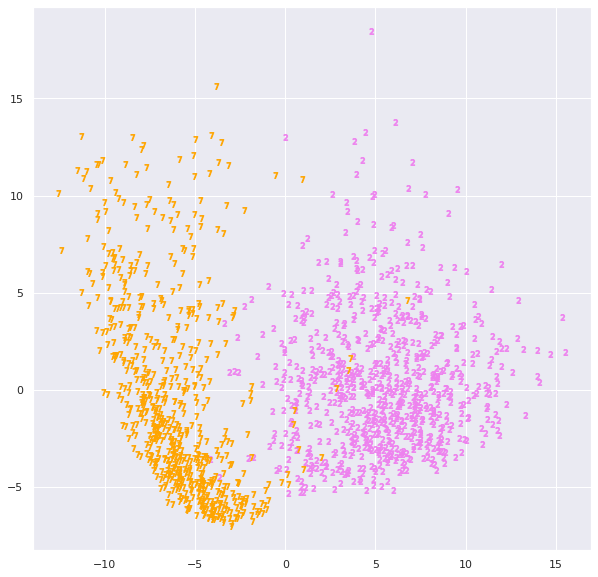

In [74]:
# Part B: Question 2
# Project binar_train onto the first two principal components and make a scatterplot of the data in the new space 
# (two-dimensional space spanned by the frist two PCs). Use a different color (or marker) for each digit. 
pca = PCA(n_components=2)

y_train = binar_train['label']
x_train = binar_train.drop('label', axis =1)

y_test = binar_test['label']
x_test = binar_test.drop('label', axis = 1)

# Step 1. Scale the data using standard scalar.  Recommended by TA during Lession 6 session
scalar = StandardScaler()

# TA in session recommended fit_transform as opposed to workbook 5
x_traning_scalar = scalar.fit_transform( x_train)
x_test_scalar = scalar.transform( x_test )

pca.fit(x_traning_scalar)
Z = pca.transform( x_traning_scalar )

print(bcolors.RED + "\n Explained Variance Ratio: " + bcolors.ENDC, pca.explained_variance_ratio_) 
# y_test
plt.scatter(Z[y_train==2,0], Z[y_train==2,1], marker='$2$', 
            color='violet', alpha = 0.9);

plt.scatter(Z[y_train==7,0], Z[y_train==7,1], marker='$7$', 
            color='orange', alpha = 0.9);


In [75]:
# Based on the plot do you think that these two digits can be separated well using only two PCs? Explain.
# The following is the different experiments to test the components
components_split = [5, 10, 15, 20]

# Summary Data Frame on Variance
summary_list = []

def evaluate_component_split( x_training_scaled, m ):
  pcaEval = PCA(n_components=m)
  pcaEval.fit(x_traning_scalar)
  z = pcaEval.transform( x_traning_scalar )
  summary_list.append( {"components":m, "Sum Explained Variance Ratio":sum(pcaEval.explained_variance_ratio_)})
  

for m in components_split:
  evaluate_component_split( x_traning_scalar, m )


summary_df = pd.DataFrame( summary_list )
summary_df.head()



,components,Sum Explained Variance Ratio
0,5,0.385416
1,10,0.527467
2,15,0.616478
3,20,0.681077


**Part B Question 2: Based on the plot do you think that these two digits can be separated well using only two PCs? Explain.**

To answer this question you need to examen how the explained variance handles against being mapped to different components size.  We know that there are 256 features in the original area so we need to determine how the well mapping to different components reflects the data.  In the above code, I tried mapping to different components and summed the explaing variance.  As we can see that as we increase the number of components we get a better explained varaince.  So althought mapping to 2 different components does a decent job with the explained variance, we can see that increasing the number of explained components will do a better.  Based on the above data, I would recommend increasing the number of components and choosing a m of around 20 to get a more accurate model


In [76]:
# Part B: Question 3
# Fit a logistic regression, in the new space, to separate digits  2  and  7 .
logreg = LogisticRegression(solver = 'liblinear', multi_class='auto')

logreg.fit(Z, y_train)

print(bcolors.RED + "The Coefficents for the Logistic Regression in the new space:" + bcolors.ENDC, logreg.coef_) 
print(bcolors.RED + "The Intercept for the Logistic Regression in the new space:" + bcolors.ENDC, logreg.intercept_)

LogisticRegression(solver='liblinear')

The Coefficents for the Logistic Regression in the new space: [[-1.12394637 -0.1104761 ]]
The Intercept for the Logistic Regression in the new space: [-1.21932236]


In [77]:
#Part B Question 4: Evaluate the trainded model on binar_test using accuracy, and an appropriate F-measure
y_test = binar_test['label']
x_test = binar_test.loc[:, binar_test.columns !='label']

x_test_scalar = scalar.transform( x_test )
y_predict = logreg.predict( pca.transform(x_test_scalar) )

print(bcolors.RED + "\n Accuracy Score: " + bcolors.ENDC, accuracy_score(y_test, y_predict))

## Note: Reviewed with TA During office hours
print(bcolors.RED + "\n F-Score: " + bcolors.ENDC, f1_score( y_test, y_predict, labels=[2,7], pos_label=7)) 
print(bcolors.RED + "\n F-Score: " + bcolors.ENDC, f1_score( y_test, y_predict, labels=[2,7], pos_label=2)) 

print(bcolors.RED + "\n Conusion Matrix: \n" + bcolors.ENDC, confusion_matrix(y_test, y_predict)) 
print(bcolors.RED + "\n Classification Report: \n" + bcolors.ENDC, classification_report(y_test, y_predict)) 



 Accuracy Score:  0.9652173913043478

 F-Score:  0.9589041095890412

 F-Score:  0.9698492462311558

 Conusion Matrix: 
 [[193   5]
 [  7 140]]

 Classification Report: 
               precision    recall  f1-score   support

           2       0.96      0.97      0.97       198
           7       0.97      0.95      0.96       147

    accuracy                           0.97       345
   macro avg       0.97      0.96      0.96       345
weighted avg       0.97      0.97      0.97       345



In [78]:
# Part B Q  6: Project the whole data onto the first  𝑚=2,3,4,5  principal components (one  𝑚  at a time).
# Part B - Q 7: For each  𝑚 , and using  5 -fold cross-validation, train a linear discriminant classifier on ziptrain.

# Summary List for accuracy
accuracy_summary_list = []

def project_onto_pca( m, x, y ):
  pca = PCA( n_components=m )

  pca.fit_transform(x)
  z = pca.transform(x)
  lda = LinearDiscriminantAnalysis()

  accuracy_cv = cross_val_score(lda, z, y, cv=5)

  return accuracy_cv

whole_scalar = StandardScaler()
y_train_label_whole = ziptrain['label']
x_train_whole = ziptrain.drop('label', axis =1)

x_train_whole_scalar = whole_scalar.fit_transform( x_train_whole )

for i in range( 2, 6):
  accuracy = project_onto_pca( i,x_train_whole_scalar,y_train_label_whole)
  print(bcolors.RED + "\n Accuracy for component : "+  str(i)  + bcolors.ENDC, accuracy)
  accurcy = "%0.2f (+/- %0.4f)"% (accuracy.mean(), accuracy.std() * 2)
  accuracy_summary_list.append ({"Components": i, "Accuracy": accurcy })




 Accuracy for component : 2 [0.52570254 0.50137174 0.51646091 0.51440329 0.52743484]

 Accuracy for component : 3 [0.574366   0.5521262  0.55555556 0.55829904 0.5617284 ]

 Accuracy for component : 4 [0.66141193 0.65294925 0.6563786  0.66666667 0.66392318]

 Accuracy for component : 5 [0.716244   0.69890261 0.70713306 0.71056241 0.70027435]


In [79]:
# Part B - Q 8:  Based on cross-validated accuracy, select the best number of principal components  𝑚
accuracy_df = pd.DataFrame( accuracy_summary_list )
accuracy_df.head()


,Components,Accuracy
0,2,0.52 (+/- 0.0187)
1,3,0.56 (+/- 0.0153)
2,4,0.66 (+/- 0.0100)
3,5,0.71 (+/- 0.0129)


Based on the summary data in the table above we can see that as the number of components increase from 2 to 5 the overall accuracy improves from 52% to 71%.  Based on this we can conclude that selecting a 5 as a component provides the best model